In [1]:
import json
import pandas as pd
import numpy as np
from textblob import TextBlob
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
colors = ["#6eccf4", "#ebc8a0"]

# Preporcessing

In [5]:
data = []
with open('data1.json', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in lines:
    data.append(json.loads(line))
    
sage_data = []
with open('data2.json', 'r', encoding='utf-8') as file:
    lines = file.readlines()
for line in lines:
    sage_data.append(json.loads(line))

In [6]:
start_time = []
end_time = []
for d in data:
    start_time.append(d["start_time"]["$date"])
    end_time.append(d["end_time"]["$date"])

In [4]:
no_sages = [1, 4,6,9, 11, 13,16, 18,19, 23, 25, 27, 29,31, 33, 35, 37, 39, 40]
with_sages = [2, 5,7,10, 12, 14,17, 20, 21, 24,26, 28, 30, 32, 34, 36, 38, 41,42]

In [75]:
len(no_sages)

19

In [76]:
len(with_sages)

19

In [154]:
events = set()
for i in with_sages:
    d = data[i]["playdata"]
    for p in d:
        events.add(p["event_type"])
events

{'continue-character',
 'continue-groupchat',
 'continue-options',
 'generate-character',
 'generate-groupchat',
 'generate-options',
 'story-description'}

# Conversation Analysis

In [77]:
single_without = []
single_with = []
multi_without = []
multi_with = []

for i in no_sages:
    d = data[i]["playdata"]
    for p in d:
        if p["event_type"] == "generate-character" and "messages" in p:
            single_without.append(p["messages"])   
        elif p["event_type"] == "generate-groupchat" and "messages" in p:
            multi_without.append(p["messages"])   

for i in with_sages:
    d = data[i]["playdata"]
    for p in d:
        if p["event_type"] == "generate-character" and "messages" in p:
            single_with.append(p["messages"])
        elif p["event_type"] == "generate-groupchat" and "messages" in p:
            multi_with.append(p["messages"]) 

In [79]:
single_without[0]

[{'role': 'system',
  'content': "You are a role playing agent. Now you should play the character: Professor McGonagall. The user will be: Harry. You job is to have a conversation with Harry as if you are the Professor McGonagall in the following story. This is your personnality Resilient, disciplined, loyal. Your response should be less than 30 words. The following is the story background of how Harry meet Professor McGonagall in Harry's view:\n        \n        Backgroud Story:\n        You are a story generator for a role-play game. The user plays the main character, and you create random follow-up stories, incorporating a sense of time passing, to help the user experience the entire narrative. This is the story: Harry Potter is a young wizard orphaned at birth. He discovers his magical abilities and attends Hogwarts School of Witchcraft and Wizardry. There, he becomes friends with Ron Weasley and Hermione Granger. The trio uncovers a plot by dark wizard Lord Voldemort to return to 

In [156]:
def get_user_message_length_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_length_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

msg_single_without = get_user_message_length_single(single_without)
msg_single_with = get_user_message_length_single(single_with)
msg_multi_without = get_user_message_length_multi(multi_without)
msg_multi_with = get_user_message_length_multi(multi_with)

msg_lists = {"msg_single_without":msg_single_without, "msg_single_with":msg_single_with, "msg_multi_without":msg_multi_without, "msg_multi_with":msg_multi_with}

In [157]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in msg_lists:
    stat, p = stats.shapiro(msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: msg_single_without    P_value: 7.452060496460078e-11
Type: msg_single_with    P_value: 2.540164523168187e-08
Type: msg_multi_without    P_value: 4.3479293516252016e-13
Type: msg_multi_with    P_value: 4.054536262287911e-09


## length of conversation message

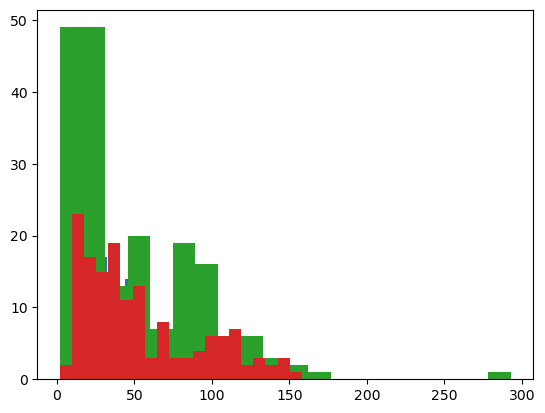

In [103]:
for cat in msg_lists:
    plt.hist(msg_lists[cat], bins = 20)
plt.show()

(array([31., 25., 23., 23., 17., 14.,  9., 14.,  8.,  3.,  4.,  3.,  0.,
         0.,  0.,  1.,  0.,  0.,  2.,  1.]),
 array([  2.,   8.,  14.,  20.,  26.,  32.,  38.,  44.,  50.,  56.,  62.,
         68.,  74.,  80.,  86.,  92.,  98., 104., 110., 116., 122.]),
 <BarContainer object of 20 artists>)

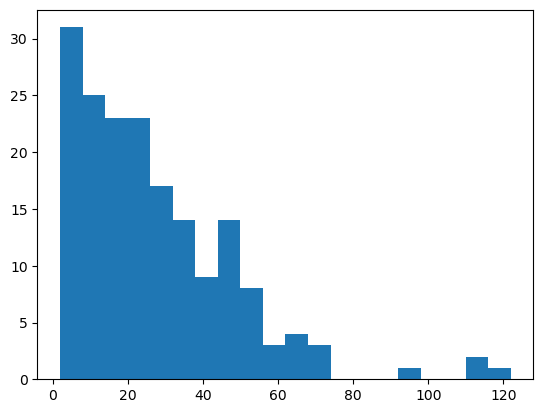

In [104]:
plt.hist(msg_single_without, bins = 20)

(array([29., 12., 17., 10., 10., 12., 11.,  4.,  8.,  5.,  5.,  3.,  2.,
         2.,  2.,  6.,  0.,  1.,  0.,  2.]),
 array([  2.  ,   7.05,  12.1 ,  17.15,  22.2 ,  27.25,  32.3 ,  37.35,
         42.4 ,  47.45,  52.5 ,  57.55,  62.6 ,  67.65,  72.7 ,  77.75,
         82.8 ,  87.85,  92.9 ,  97.95, 103.  ]),
 <BarContainer object of 20 artists>)

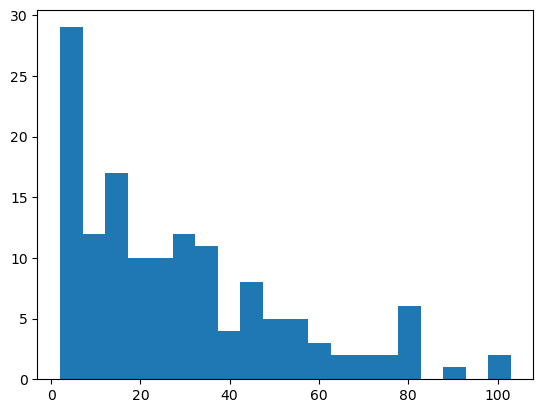

In [44]:
plt.hist(msg_single_with, bins = 20)

(array([49., 49., 13., 20.,  7., 19., 16.,  4.,  6.,  3.,  2.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  2.  ,  16.55,  31.1 ,  45.65,  60.2 ,  74.75,  89.3 , 103.85,
        118.4 , 132.95, 147.5 , 162.05, 176.6 , 191.15, 205.7 , 220.25,
        234.8 , 249.35, 263.9 , 278.45, 293.  ]),
 <BarContainer object of 20 artists>)

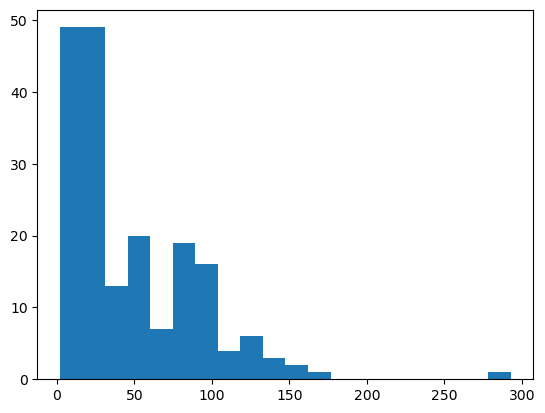

In [45]:
plt.hist(msg_multi_without, bins = 20)

(array([ 2., 23., 17., 15., 19., 11., 13.,  3.,  8.,  3.,  3.,  4.,  6.,
         6.,  7.,  2.,  3.,  2.,  3.,  1.]),
 array([  2. ,   9.8,  17.6,  25.4,  33.2,  41. ,  48.8,  56.6,  64.4,
         72.2,  80. ,  87.8,  95.6, 103.4, 111.2, 119. , 126.8, 134.6,
        142.4, 150.2, 158. ]),
 <BarContainer object of 20 artists>)

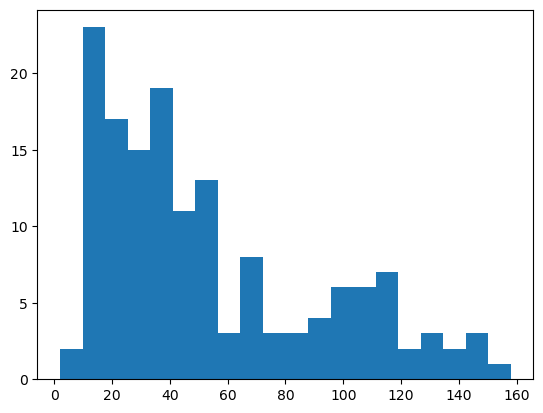

In [46]:
plt.hist(msg_multi_with, bins = 20)

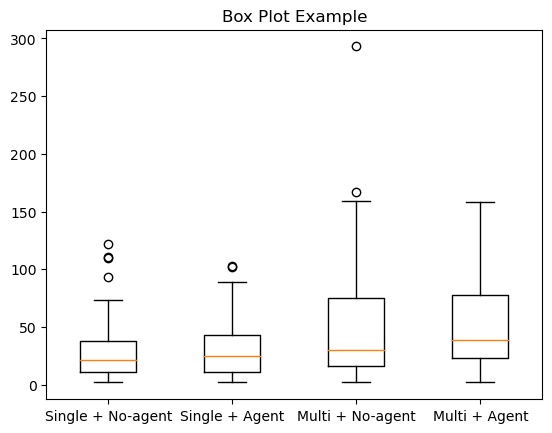

In [158]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([msg_single_without, msg_single_with, msg_multi_without,msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs np_agent

In [111]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(msg_single_without, msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(msg_multi_without, msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=12114.5, pvalue=0.5956502466128203)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=12126.0, pvalue=0.014136703046595523)


### conversation_group_chat

In [112]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12018.5, pvalue=1.6090448408022327e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6189.5, pvalue=6.391351270370662e-10)


## word counts

In [159]:
def get_user_message_words_single(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_words_multi(chat):
    user_message_lengths_list = [[len(msg["content"].split(" ")) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths = [*user_message_lengths, *msg_list]
    return user_message_lengths

words_msg_single_without = get_user_message_words_single(single_without)
words_msg_single_with = get_user_message_words_single(single_with)
words_msg_multi_without = get_user_message_words_multi(multi_without)
words_msg_multi_with = get_user_message_words_multi(multi_with)

words_msg_lists = {"words_msg_single_without":words_msg_single_without, "words_msg_single_with":words_msg_single_with, 
                   "words_msg_multi_without":words_msg_multi_without, "words_msg_multi_with":words_msg_multi_with}

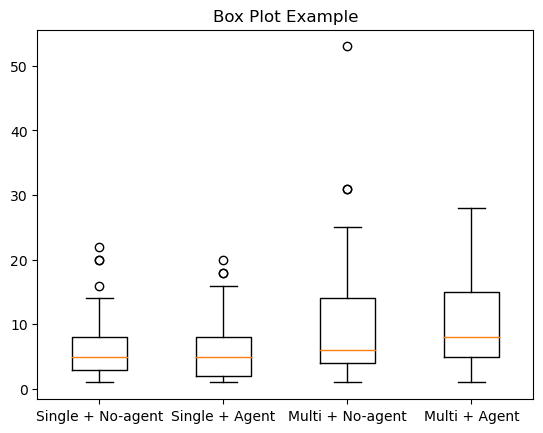

In [160]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([words_msg_single_without, words_msg_single_with, words_msg_multi_without,words_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

### agent vs no_agent

In [137]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(words_msg_multi_without, words_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=12152.5, pvalue=0.6263956894958227)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=12196.5, pvalue=0.017265950305472323)


### conversation_group_chat

In [138]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12376.5, pvalue=8.054889929239053e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6393.0, pvalue=3.397900112085238e-09)


## Sentiment of message

In [161]:
def get_senti(msgs):
    sentences = []
    polarity = []
    subjectivity = []
    for messages in msgs:
        for msg in messages[1:]:
            if "role" in msg and msg["role"] == "user":
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
                
            elif "speaker" in msg and msg["speaker"] in roles:
                blob = TextBlob(msg["content"])

                # Get the sentiment
                sentiment = blob.sentiment
                sentences.append(msg["content"])
                polarity.append(sentiment.polarity)
                subjectivity.append(sentiment.subjectivity)
    return pd.DataFrame({"polarity":polarity, "subjectivity":subjectivity, "sentence":sentences})

sent_single_without = get_senti( single_without)
sent_single_with = get_senti( single_with)
sent_multi_without = get_senti( multi_without)
sent_multi_with = get_senti(multi_with)

sents = {"single_without":sent_single_without, "single_with":sent_single_with,"multi_without":sent_multi_without, "multi_with":sent_multi_with }

In [94]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in sents:
    stat1, p1 = stats.shapiro(sents[cat]["polarity"])
    stat2, p2 = stats.shapiro(sents[cat]["subjectivity"])
    print("Type:", cat , "  polarity:",p1,"    subjectivity:",p2)

Type: single_without   polarity: 4.137270495814527e-13     subjectivity: 4.610891187498091e-15
Type: single_with   polarity: 2.5759006039294263e-11     subjectivity: 1.943851573845204e-13
Type: multi_without   polarity: 2.1045389823198812e-12     subjectivity: 1.8554085608950104e-14
Type: multi_with   polarity: 6.755647256884156e-12     subjectivity: 8.008211335817222e-14


### agent vs no_agent

In [89]:
# : scatter plot: no big difference across with/without agents

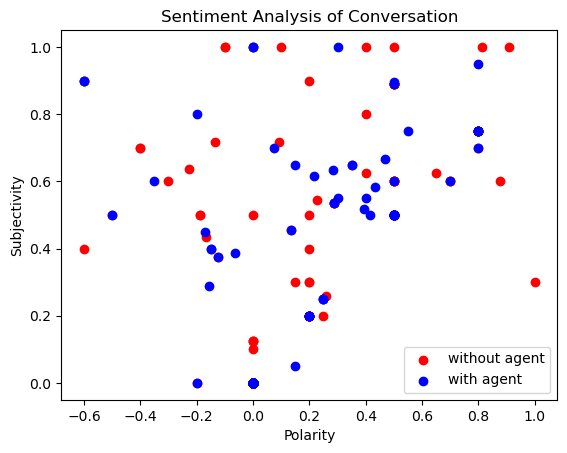

In [162]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color="red")
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

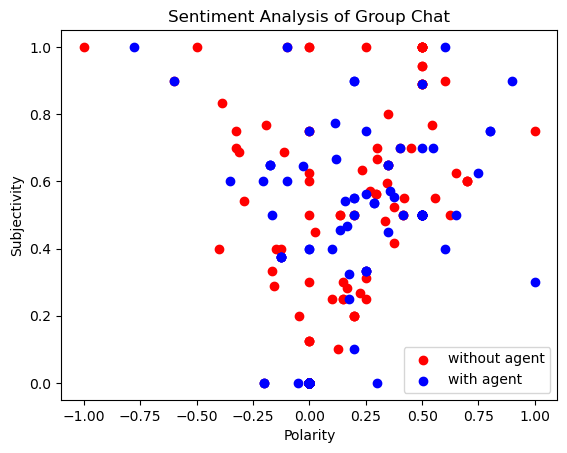

In [81]:
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color="red")
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Group Chat')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [163]:
# p_value all larger than 0.05, so we don't think agent change polarity or subjectivity
print("single - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_single_with['polarity']))
print("single - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_single_with['subjectivity']))
print("multi - polarity:   ", stats.mannwhitneyu(sent_multi_without['polarity'], sent_single_with['polarity']))
print("multi - subjectivity:   ", stats.mannwhitneyu(sent_multi_without['subjectivity'], sent_single_with['subjectivity']))

single - polarity:    MannwhitneyuResult(statistic=12672.5, pvalue=0.8690236660922628)
single - subjectivity:    MannwhitneyuResult(statistic=12820.0, pvalue=0.7197149100546341)
multi - polarity:    MannwhitneyuResult(statistic=13182.5, pvalue=0.7887715169198106)
multi - subjectivity:    MannwhitneyuResult(statistic=14482.5, pvalue=0.17641619586799806)


### conversation vs group chat

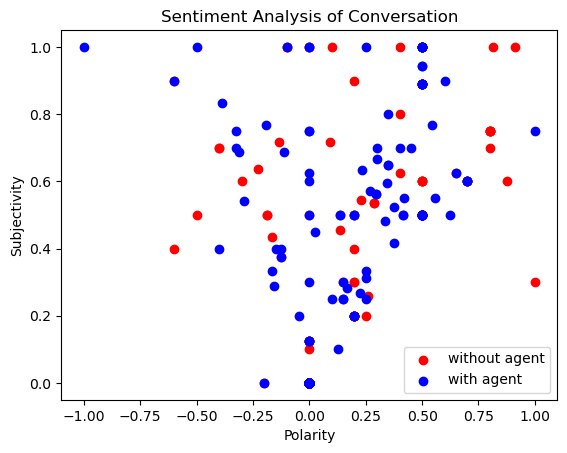

In [108]:
plt.scatter(sent_single_without['polarity'], sent_single_without['subjectivity'], color="red")
plt.scatter(sent_multi_without['polarity'], sent_multi_without['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

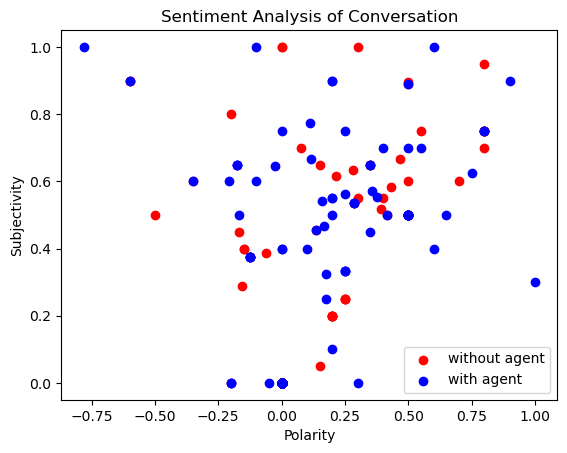

In [109]:
plt.scatter(sent_single_with['polarity'], sent_single_with['subjectivity'], color="red")
plt.scatter(sent_multi_with['polarity'], sent_multi_with['subjectivity'], color="blue")
plt.legend(["without agent", "with agent"], loc ="lower right") 
plt.title('Sentiment Analysis of Conversation')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

# Show the plot
plt.show()

In [107]:
# p_value all larger than 0.05, so we don't think grouchat change polarity or subjectivity
print("no_agent - polarity:   ", stats.mannwhitneyu(sent_single_without['polarity'], sent_multi_without['polarity']))
print("no_agent - subjectivity:   ", stats.mannwhitneyu(sent_single_without['subjectivity'], sent_multi_without['subjectivity']))
print("agent - polarity:   ", stats.mannwhitneyu(sent_single_with['polarity'], sent_multi_with['polarity']))
print("agent - subjectivity:   ", stats.mannwhitneyu(sent_single_with['subjectivity'], sent_multi_with['subjectivity']))

no_agent - polarity:    MannwhitneyuResult(statistic=17344.0, pvalue=0.6429469157912864)
no_agent - subjectivity:    MannwhitneyuResult(statistic=15932.0, pvalue=0.3055137035272154)
agent - polarity:    MannwhitneyuResult(statistic=11238.5, pvalue=0.36996356039148315)
agent - subjectivity:    MannwhitneyuResult(statistic=10658.0, pvalue=0.9855120371077102)


## number of messages per conversation

In [146]:
# based on following result, we don't think agent or group chat improvde user engagement in each chatiing

In [80]:
def get_user_message_count_single(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["role"] == "user"] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

roles = [ "Harry", "Geralt", "Lin"]
def get_user_message_count_multi(chat):
    user_message_lengths_list = [[len(msg["content"]) for msg in msgs[1:] if msg["speaker"] in roles] for msgs in chat]
    user_message_lengths = []
    for msg_list in user_message_lengths_list:
        user_message_lengths.append(len(msg_list))
    return user_message_lengths

count_msg_single_without = get_user_message_count_single(single_without)
count_msg_single_with = get_user_message_count_single(single_with)
count_msg_multi_without = get_user_message_count_multi(multi_without)
count_msg_multi_with = get_user_message_count_multi(multi_with)

count_msg_lists = {"count_msg_single_without":count_msg_single_without, "count_msg_single_with":count_msg_single_with, 
             "count_msg_multi_without":count_msg_multi_without, "count_msg_multi_with":count_msg_multi_with}

In [165]:
# test if normal distribution
# if p is > 0.05, we assume it is normal distribution, therefore, for don't think it belongs to t_test
for cat in count_msg_lists:
    stat, p = stats.shapiro(count_msg_lists[cat])
    print("Type:", cat , "   P_value:",p)

Type: count_msg_single_without    P_value: 6.611700882785954e-06
Type: count_msg_single_with    P_value: 0.00025015592109411955
Type: count_msg_multi_without    P_value: 0.0003388656477909535
Type: count_msg_multi_with    P_value: 0.0011399361537769437


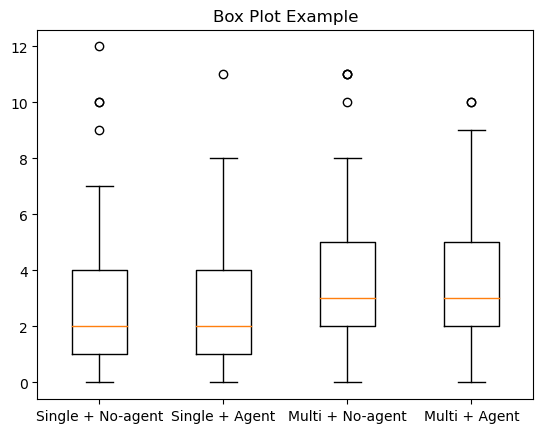

In [166]:
fig, ax = plt.subplots()

# Creating box plot
ax.boxplot([count_msg_single_without, count_msg_single_with, count_msg_multi_without,count_msg_multi_with])

# Adding titles and labels
ax.set_title('Box Plot Example')
ax.set_xticklabels(['Single + No-agent', 'Single + Agent','Multi + No-agent', 'Multi + Agent'])

# Showing the plot
plt.show()

In [119]:
print("U-test--agent vs no_agent-- conversation:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_single_with) )
print("U-test--agent vs no_agent-- group chat:     ", stats.mannwhitneyu(count_msg_multi_without, count_msg_multi_with) )

U-test--agent vs no_agent-- conversation:    MannwhitneyuResult(statistic=1583.0, pvalue=0.6355045971055463)
U-test--agent vs no_agent-- group chat:      MannwhitneyuResult(statistic=1059.0, pvalue=0.9595464703748684)


In [120]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=1352.0, pvalue=0.2784424466008236)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=862.0, pvalue=0.14591846995023908)


## combine

### message length

In [186]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(msg_single_without, msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(msg_single_with, msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12018.5, pvalue=1.6090448408022327e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6189.5, pvalue=6.391351270370662e-10)


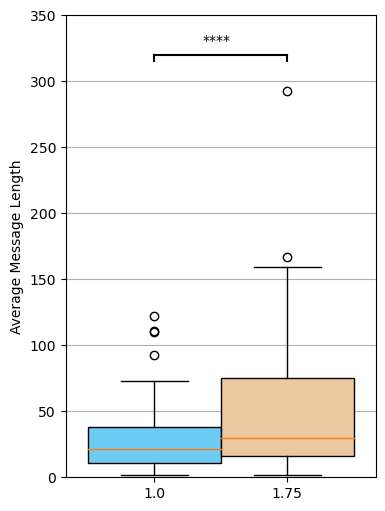

In [201]:
xr = [1, 1.75]
sg_height = 320
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,350)
box = ax.boxplot([msg_single_without, msg_multi_without], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 5
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 325, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

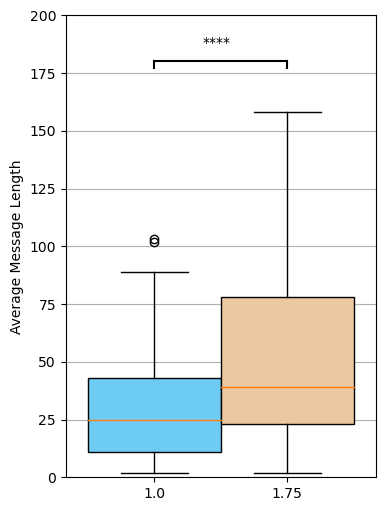

In [225]:
xr = [1, 1.75]
sg_height = 180
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,200)
box = ax.boxplot([msg_single_with, msg_multi_with], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 3
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 185, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

### word counts

In [204]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(words_msg_single_without, words_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(words_msg_single_with, words_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=12376.5, pvalue=8.054889929239053e-06)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=6393.0, pvalue=3.397900112085238e-09)


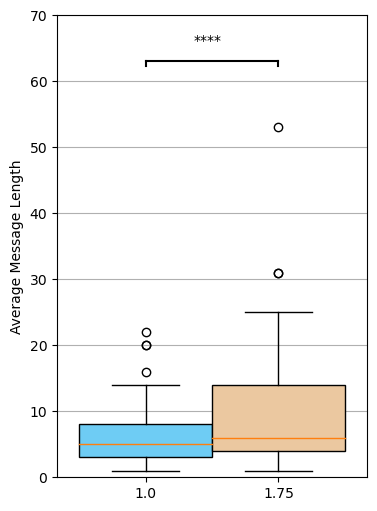

In [228]:
xr = [1, 1.75]
sg_height = 63
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,70)
box = ax.boxplot([words_msg_single_without, words_msg_multi_without], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 0.7
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 65, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

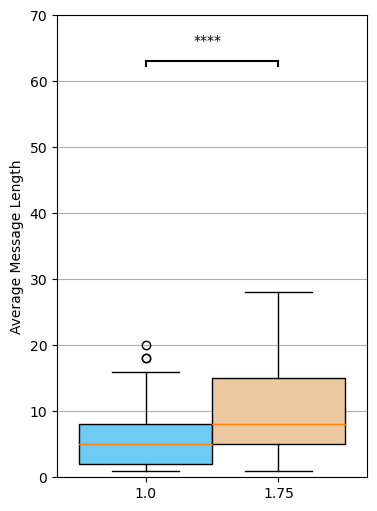

In [229]:
xr = [1, 1.75]
sg_height = 63
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,70)
box = ax.boxplot([words_msg_single_with, words_msg_multi_with], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 0.7
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 65, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

### number of messages

In [211]:
print("U-test--conversation vs group chat-- no_agent:   ", stats.mannwhitneyu(count_msg_single_without, count_msg_multi_without) ) 
print("U-test--conversation vs group chat-- agent:      ", stats.mannwhitneyu(count_msg_single_with, count_msg_multi_with) ) 

U-test--conversation vs group chat-- no_agent:    MannwhitneyuResult(statistic=1352.0, pvalue=0.2784424466008236)
U-test--conversation vs group chat-- agent:       MannwhitneyuResult(statistic=862.0, pvalue=0.14591846995023908)


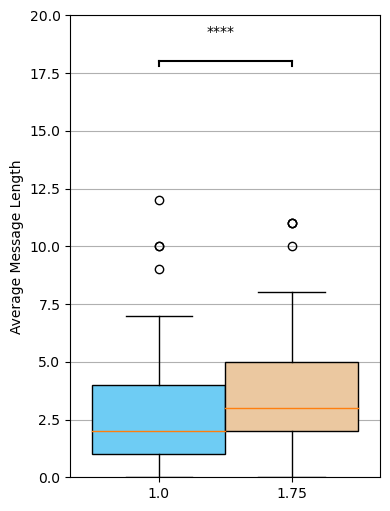

In [232]:
xr = [1, 1.75]
sg_height = 18
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,20)
box = ax.boxplot([count_msg_single_without, count_msg_multi_without], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 0.2
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 19, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

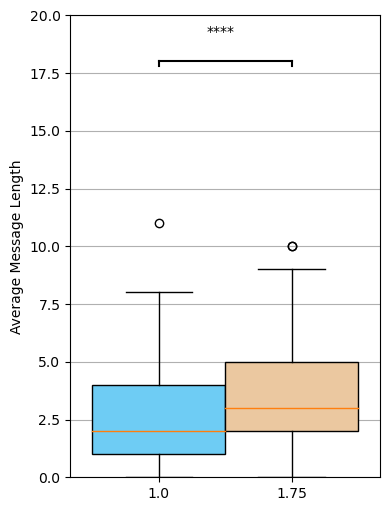

In [233]:
xr = [1, 1.75]
sg_height = 18
fig, ax = plt.subplots(figsize=(4, 6))
ax.set_ylim(0,20)
box = ax.boxplot([count_msg_single_with, count_msg_multi_with], positions=xr, widths=0.75, patch_artist=True)
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)


# Draw the small vertical line at each end
vertical_height = 0.2
plt.plot([xr[0], xr[0]], [sg_height, sg_height -vertical_height], color='black')
plt.plot([xr[1], xr[1]], [sg_height, sg_height - vertical_height], color='black')

# Connect the vertical lines with a horizontal line
plt.plot(xr, [sg_height , sg_height ], color='black')
plt.text(1.35, 19, "****", ha='center', va='bottom')

# Customize the axes
ax.set_ylabel('Average Message Length')
ax.yaxis.grid(True)  # Add horizontal grid lines
plt.show()

# Narration Arc and Cognition Tension

In [20]:
count = 0
for index in no_sages:
    count += 1
    filename = "stories/story"+ str(count) + "_no_sage_" + str(index) +  ".txt" 
    with open(filename, "w") as f:
        d = data[index]["playdata"]
        for i in range(len(d)):
            f.write(d[i]["story"])
    f.close()

for index in with_sages:
    count += 1
    filename = "stories/story"+ str(count) + "_sage_" + str(index) +  ".txt" 
    with open(filename, "w") as f:
        d = data[index]["playdata"]
        for i in range(len(d)):
            f.write(d[i]["story"])
    f.close()

In [9]:
s_l_2

[4, 15, 17, 25, 17, 14, 17, 29, 11, 11, 15, 13, 33, 35, 19, 18, 12, 11, 3]

In [8]:
s_l_1

[23, 1, 13, 23, 23, 15, 9, 13, 13, 19, 13, 12, 21, 46, 43, 22, 18, 31, 17]

In [7]:
s_l_1, s_l_2 = [], []

count = 0
for index in no_sages:
    count += 1
    d = data[index]["playdata"]
    # print(len(d))
    s_l_1.append(len(d))


for index in with_sages:
    count += 1
    d = data[index]["playdata"]
    # print(len(d))
    s_l_2.append(len(d))

In [18]:
df_nar = pd.read_csv("story_vis/LIWC-22 Results - 38 File(s) - Narrative Arc Table.csv")
df_nar = df_nar.dropna()

In [19]:
df_nar.head()

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,PlotProg_1,PlotProg_2,PlotProg_3,PlotProg_4,PlotProg_5,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5
0,story1_no_sage_1.txt,1660,10.42,-34.96,-6.56,72.79,-0.23,0.76,0.76,0.34,...,0.08,1.49,-0.92,-0.92,0.28,-0.87,0.27,0.27,1.40,-1.06
2,story3_no_sage_6.txt,925,51.30,54.25,47.70,51.96,0.85,0.85,0.46,-1.08,...,-0.84,-0.99,0.03,0.32,1.48,-0.50,-0.50,0.34,1.59,-0.92
3,story4_no_sage_9.txt,1656,-26.36,-36.93,-35.88,-6.26,-1.00,0.39,0.78,-1.14,...,0.68,0.18,-1.76,0.54,0.36,0.47,1.21,-1.36,0.30,-0.62
4,story5_no_sage_11.txt,1639,1.26,-12.88,-41.53,58.19,0.07,0.73,1.13,-0.59,...,0.87,-0.30,0.58,-1.61,0.46,-1.06,0.20,1.58,-0.56,-0.17
5,story6_no_sage_13.txt,1137,66.78,61.64,45.16,93.53,0.78,-0.72,-1.20,-0.06,...,-0.54,-0.18,1.29,0.68,-1.24,-1.55,-0.30,0.96,0.76,0.13


In [20]:
df_nar_no_sage = df_nar.iloc[0:18,]
df_nar_sage = df_nar.iloc[18:,]
df_nar_sage

,Filename,WC,Narrativity_Overall,Narrativity_Staging,Narrativity_PlotProg,Narrativity_CogTension,Staging_1,Staging_2,Staging_3,Staging_4,...,PlotProg_1,PlotProg_2,PlotProg_3,PlotProg_4,PlotProg_5,CogTension_1,CogTension_2,CogTension_3,CogTension_4,CogTension_5
19,story20_sage_2.txt,313,36.27,18.53,68.12,22.16,0.35,1.29,0.04,-1.47,...,-1.07,-0.70,-0.33,1.23,0.86,-0.53,-1.39,0.32,1.24,0.37
20,story21_sage_5.txt,1287,-25.52,-75.18,-3.86,2.49,-1.64,0.56,-0.19,0.36,...,0.23,-1.26,0.70,1.12,-0.79,-0.25,1.55,-0.84,-0.84,0.37
21,story22_sage_7.txt,1193,34.05,45.17,-7.97,64.94,1.04,-1.63,0.44,-0.07,...,-0.08,0.26,-0.08,-1.45,1.35,-0.43,1.50,0.34,-0.22,-1.19
22,story23_sage_10.txt,1815,-20.65,6.50,-7.32,-61.13,0.20,-0.94,1.62,-0.65,...,0.19,1.64,-0.77,-0.77,-0.29,0.85,-1.54,-0.48,0.58,0.58
23,story24_sage_12.txt,1201,-21.16,20.87,-93.26,8.89,0.40,-0.67,-1.25,1.34,...,1.49,0.32,0.01,-0.91,-0.91,-0.57,1.32,-1.19,-0.25,0.69
24,story25_sage_14.txt,986,-2.67,-39.13,5.02,26.09,-1.06,0.41,0.41,-0.99,...,-0.31,-0.80,-0.98,0.78,1.31,-1.25,-0.09,0.14,-0.32,1.52
25,story26_sage_17.txt,1275,36.16,73.89,77.58,-42.99,1.15,0.84,-0.70,-1.21,...,-1.15,-0.92,0.38,1.20,0.49,-0.36,-1.02,-0.36,0.09,1.64
26,story27_sage_20.txt,2124,-27.14,-67.77,44.21,-57.87,-1.25,-0.25,-0.45,1.35,...,-1.15,0.53,0.04,-0.76,1.35,0.45,0.26,-0.49,-1.43,1.21
27,story28_sage_21.txt,782,45.25,28.98,79.97,26.80,0.68,1.16,-1.41,0.03,...,-1.32,-0.73,1.08,0.68,0.29,-1.19,-0.45,0.05,0.05,1.54
28,story29_sage_24.txt,736,-22.11,-14.43,-40.90,-11.00,-0.19,0.60,1.34,-1.25,...,1.07,-0.66,-0.66,1.11,-0.86,1.01,-0.25,0.72,0.07,-1.55


## radar

In [90]:
data1

array([ -4.62111111, -12.81444444,  -9.11944444,   8.07      ])

In [91]:
data2

array([ 2.04      ,  4.53833333, -3.87888889,  5.45888889])

[ -4.62111111 -12.81444444  -9.11944444   8.07        -4.62111111]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]
[ 2.04        4.53833333 -3.87888889  5.45888889  2.04      ]   [0.0, 1.5707963267948966, 3.141592653589793, 4.71238898038469, 0.0]


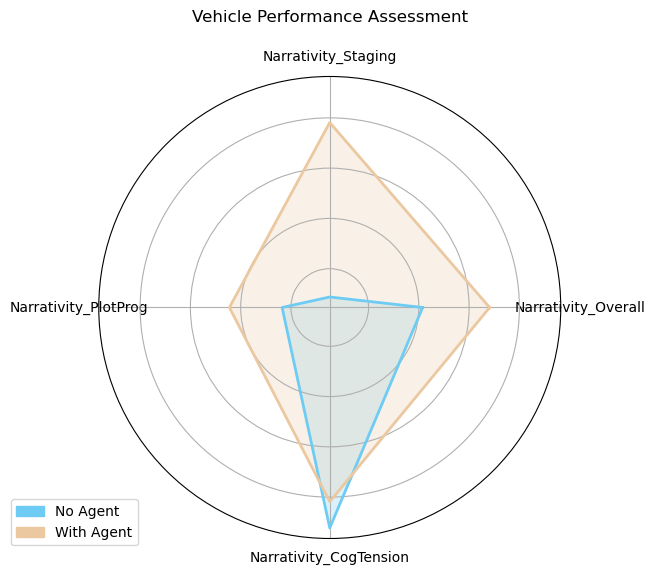

In [89]:
labels=np.array(['Narrativity_Overall', 'Narrativity_Staging', 'Narrativity_PlotProg', 'Narrativity_CogTension'])
data1=np.array([df_nar_no_sage["Narrativity_Overall"].mean(),
                df_nar_no_sage["Narrativity_Staging"].mean(),
                df_nar_no_sage["Narrativity_PlotProg"].mean(),
                df_nar_no_sage["Narrativity_CogTension"].mean(),
               ])
data2=np.array([df_nar_sage["Narrativity_Overall"].mean(),
                df_nar_sage["Narrativity_Staging"].mean(),
                df_nar_sage["Narrativity_PlotProg"].mean(),
                df_nar_sage["Narrativity_CogTension"].mean(),
               ])


def draw_radar(labels, *datas):
    # Create radar plot
    angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False).tolist()
    angles+=angles[:1]

    # The plot is circular, so we need to "complete the loop" and append the start to the end.
    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    count = 0
    for data in datas:
        count += 1
        processed_data=np.concatenate((data,[data[0]]))
        
        print(processed_data, " ", angles)
        ax.fill(angles, processed_data, color=colors[count-1], alpha=0.25)
        ax.plot(angles, processed_data, color=colors[count-1], linewidth=2)  # Change the color if needed

    # Labels for each point
    ax.set_yticklabels([])
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)

    # Title of the plot
    ax.set_title('Vehicle Performance Assessment', y=1.1)

    legend_patches = [
        mpatches.Patch(color=colors[0], label='No Agent'),
        mpatches.Patch(color=colors[1], label='With Agent')
    ]
    ax.legend(handles=legend_patches, loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.show()
draw_radar(labels, data1, data2)

In [86]:
print("Narrativity_Overall", stats.mannwhitneyu(df_nar_no_sage["Narrativity_Overall"], df_nar_sage["Narrativity_Overall"]))
print("Narrativity_Staging", stats.mannwhitneyu(df_nar_no_sage["Narrativity_Staging"], df_nar_sage["Narrativity_Staging"]))
print("Narrativity_PlotProg", stats.mannwhitneyu(df_nar_no_sage["Narrativity_PlotProg"], df_nar_sage["Narrativity_PlotProg"]))
print("Narrativity_CogTension", stats.mannwhitneyu(df_nar_no_sage["Narrativity_CogTension"], df_nar_sage["Narrativity_CogTension"]))

Narrativity_Overall MannwhitneyuResult(statistic=139.0, pvalue=0.4765462117850495)
Narrativity_Staging MannwhitneyuResult(statistic=133.0, pvalue=0.36721620202250527)
Narrativity_PlotProg MannwhitneyuResult(statistic=151.0, pvalue=0.7397342431142654)
Narrativity_CogTension MannwhitneyuResult(statistic=166.0, pvalue=0.911826411753384)


In [24]:
def draw_lines(labels, data1, data2):
    # Sample data

    #data1
    # Plotting the lines
    plt.plot(labels, data1[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data1[1], label='median', color=colors[0])
    plt.plot(labels, data1[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data1[0],data1[1], color=colors[0], alpha=0.3)
    plt.fill_between(labels, data1[1], data1[2], color=colors[0], alpha=0.3)
    
    
    
    
    #Data2
    plt.plot(labels, data2[0], label='.25 Quantile', color="#fff")
    plt.plot(labels, data2[1], label='median', color=colors[1])
    plt.plot(labels, data2[2], label='.75 Quantile' , color="#fff")

    # Filling the area between the lines
    plt.fill_between(labels, data2[0],data2[1], color=colors[1], alpha=0.3)
    plt.fill_between(labels, data2[1], data2[2], color=colors[1], alpha=0.3)

    # Adding labels and title
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title('Line Plot with Filled Areas')
    plt.legend()

    # Display the plot
    plt.show()

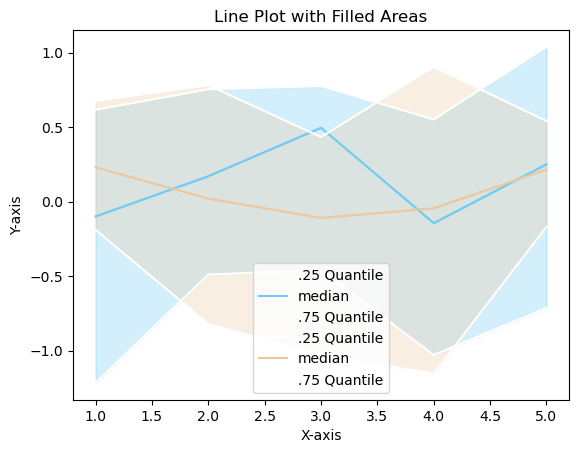

In [27]:
data_stage_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_stage_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['Staging_1',
       'Staging_2', 'Staging_3', 'Staging_4', 'Staging_5']
for c in columns:
    data_stage_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_stage_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_stage_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_stage_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_stage_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_stage_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_stage_no_agent, data_stage_agent)

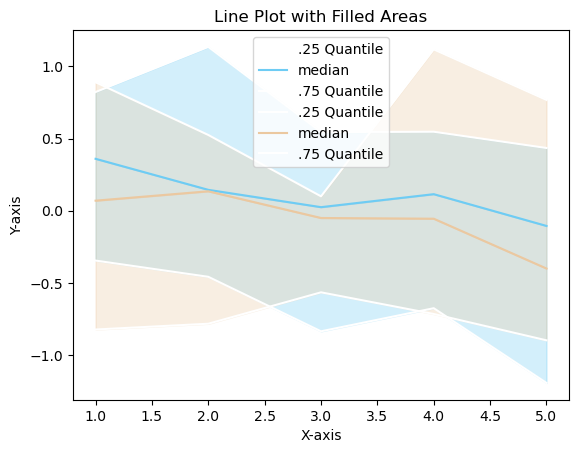

In [32]:
data_prog_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_prog_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['PlotProg_1',
       'PlotProg_2', 'PlotProg_3', 'PlotProg_4', 'PlotProg_5']
for c in columns:
    data_prog_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_prog_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_prog_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_prog_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_prog_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_prog_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_prog_no_agent, data_prog_agent)

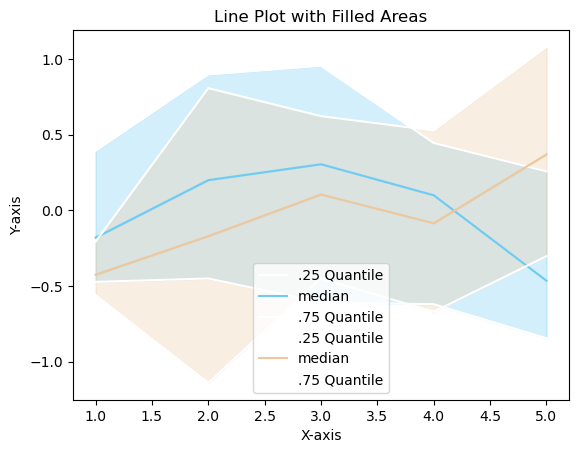

In [33]:
data_tension_no_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
data_tension_agent = [[], [], []] # 0.25 quatile, 0.5quantile, 0.75 quatile
columns = ['CogTension_1',
       'CogTension_2', 'CogTension_3', 'CogTension_4', 'CogTension_5']
for c in columns:
    data_tension_no_agent[0].append(df_nar_no_sage[c].quantile(0.25))
    data_tension_no_agent[1].append(df_nar_no_sage[c].quantile(0.5))
    data_tension_no_agent[2].append(df_nar_no_sage[c].quantile(0.75))
    
    data_tension_agent[0].append(df_nar_sage[c].quantile(0.25))
    data_tension_agent[1].append(df_nar_sage[c].quantile(0.5))
    data_tension_agent[2].append(df_nar_sage[c].quantile(0.75))

draw_lines([1,2,3,4,5], data_tension_no_agent, data_tension_agent)

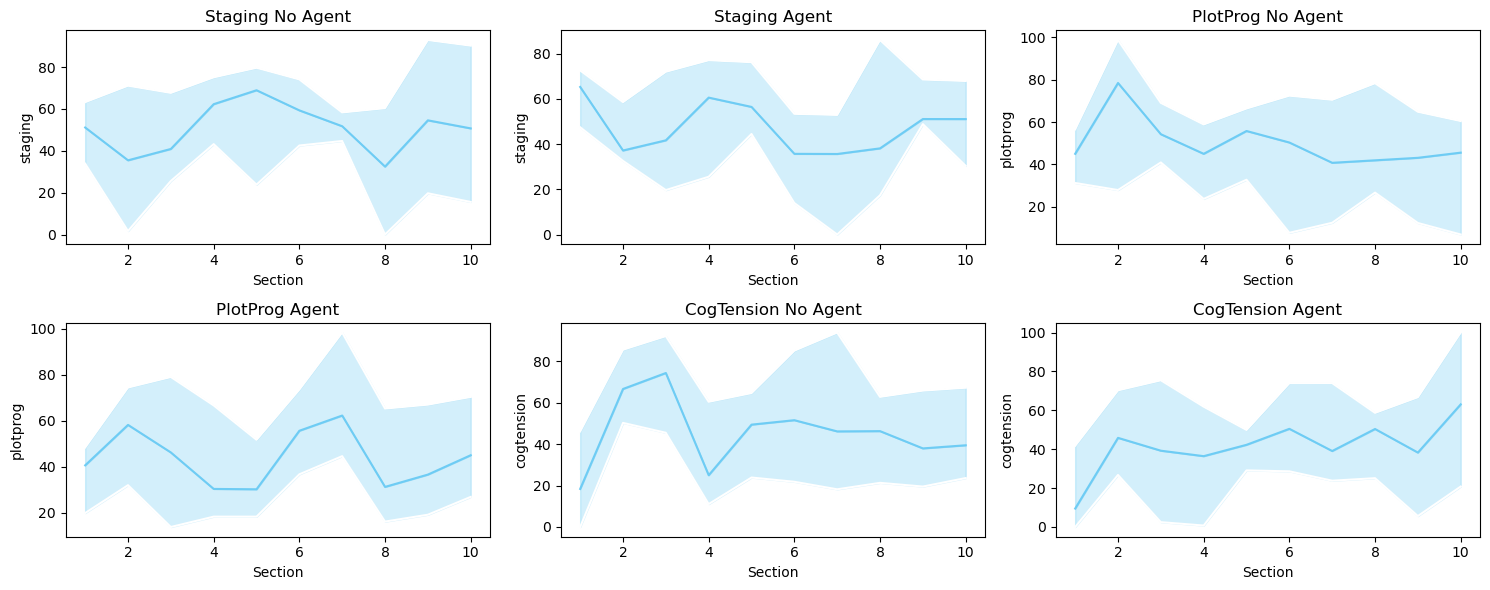

In [133]:
def draw_3_2_area_plot(x,titles,x_labels,y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    count = 0
    for data in datas:
        count += 1
        plt.subplot(2, 3, count) 
        plt.plot(x, data[0], label='.25 Quantile', color="#fff")
        plt.plot(x, data[1], label='median', color=colors[0])
        plt.plot(x, data[2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, data[0], data[1], color=colors[0], alpha=0.3)
        plt.fill_between(x, data[1], data[2], color=colors[0], alpha=0.3)
        
        plt.title(titles[count - 1])
        plt.xlabel(x_labels[count - 1])
        plt.ylabel(y_labels[count - 1])
    
    plt.tight_layout()

    # Display the plot
    plt.show()
    
draw_3_2_area_plot([1,2,3,4,5,6,7,8,9,10],
                   ["Staging No Agent","Staging Agent","PlotProg No Agent","PlotProg Agent","CogTension No Agent","CogTension Agent" ],
                   ["Section"]*6,
                   ["staging", "staging", "plotprog", "plotprog", "cogtension","cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )

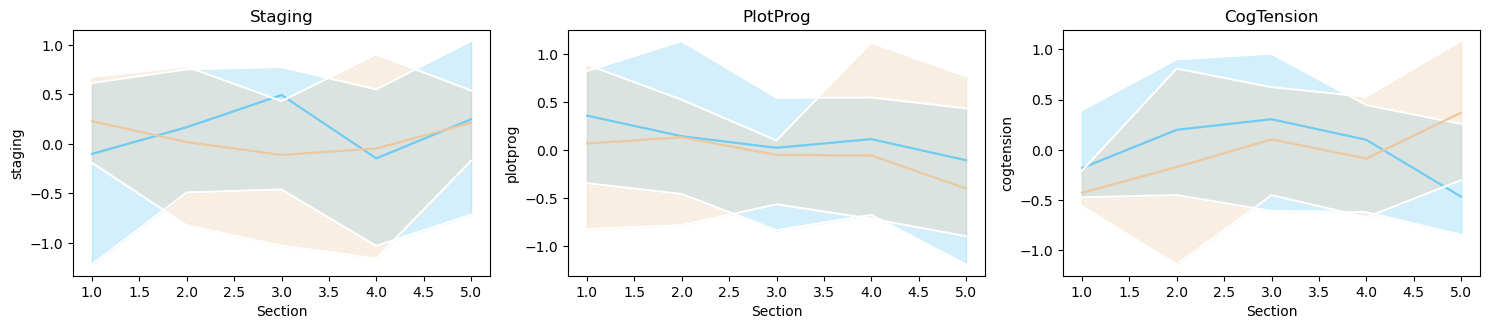

In [34]:
def draw_3_1_area_plot(x,titles,x_labels,y_labels ,*datas):
    plt.figure(figsize=(15, 6))
    
    for i in range(0,6,2):
        plt.subplot(2, 3, i//2 + 1) 
        plt.plot(x, datas[i][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i][1], label='median', color=colors[0])
        plt.plot(x, datas[i][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i][0], datas[i][1], color=colors[0], alpha=0.3)
        plt.fill_between(x, datas[i][1], datas[i][2], color=colors[0], alpha=0.3)
        
        
        
        plt.plot(x, datas[i+1][0], label='.25 Quantile', color="#fff")
        plt.plot(x, datas[i+1][1], label='median', color=colors[1])
        plt.plot(x, datas[i+1][2], label='.75 Quantile' , color="#fff")
        plt.fill_between(x, datas[i+1][0], datas[i+1][1], color=colors[1], alpha=0.3)
        plt.fill_between(x, datas[i+1][1], datas[i+1][2], color=colors[1], alpha=0.3)
        
        plt.title(titles[i//2])
        plt.xlabel(x_labels[i//2])
        plt.ylabel(y_labels[i//2])
    
    plt.tight_layout()

    # Display the plot
    # fig.legend(lines, labels, loc='lower center', ncol=4)
    plt.show()
    
draw_3_1_area_plot([1,2,3,4,5],
                   ["Staging","PlotProg","CogTension"],
                   ["Section"]*3,
                   ["staging", "plotprog", "cogtension"] ,
                   data_stage_no_agent,
                   data_stage_agent,
                   data_prog_no_agent,
                   data_prog_agent,
                   data_tension_no_agent,
                   data_tension_agent
                  )

In [43]:
print("Staging")
for i in range(5):
    print("section", i+1, "  :", stats.mannwhitneyu(df_nar_no_sage["Staging_" + str(i+1)], df_nar_sage["Staging_" + str(i+1)]  ))

Staging
section 1   : MannwhitneyuResult(statistic=125.5, pvalue=0.254646346147265)
section 2   : MannwhitneyuResult(statistic=171.0, pvalue=0.7879850135276372)
section 3   : MannwhitneyuResult(statistic=209.0, pvalue=0.14123841781192514)
section 4   : MannwhitneyuResult(statistic=159.0, pvalue=0.9369518188392498)
section 5   : MannwhitneyuResult(statistic=163.0, pvalue=0.9873769266859034)


In [44]:
print("PlotProg")
for i in range(5):
    print("section", i+1, "  :", stats.mannwhitneyu(df_nar_no_sage["PlotProg_" + str(i+1)], df_nar_sage["PlotProg_" + str(i+1)]  ))

PlotProg
section 1   : MannwhitneyuResult(statistic=183.0, pvalue=0.5164946088122544)
section 2   : MannwhitneyuResult(statistic=179.0, pvalue=0.6016446404961844)
section 3   : MannwhitneyuResult(statistic=167.5, pvalue=0.8742966980307388)
section 4   : MannwhitneyuResult(statistic=131.5, pvalue=0.3425091993837791)
section 5   : MannwhitneyuResult(statistic=147.0, pvalue=0.6463855352799937)


In [45]:
print("CogTension")
for i in range(5):
    print("section", i+1, "  :", stats.mannwhitneyu(df_nar_no_sage["CogTension_" + str(i+1)], df_nar_sage["CogTension_" + str(i+1)]  ))

CogTension
section 1   : MannwhitneyuResult(statistic=193.0, pvalue=0.33452507877248094)
section 2   : MannwhitneyuResult(statistic=187.0, pvalue=0.4381946202687397)
section 3   : MannwhitneyuResult(statistic=169.5, pvalue=0.8246486168873879)
section 4   : MannwhitneyuResult(statistic=168.0, pvalue=0.861855796318015)
section 5   : MannwhitneyuResult(statistic=112.5, pvalue=0.12095191220432301)


In [51]:
df_nar_no_sage[["Staging_1", "Staging_2", "Staging_3","Staging_4", "Staging_5"]].iloc[0,]

Staging_1   -0.23
Staging_2    0.76
Staging_3    0.76
Staging_4    0.34
Staging_5   -1.64
Name: 0, dtype: float64

In [ ]:
# 线性回归分析
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(range(len(a)), a)
slope_b, intercept_b, r_value_b, p_value_b, std_err_b = stats.linregress(range(len(b)), b)
print("组A的趋势斜率：", slope_a)
print("组B的趋势斜率：", slope_b)

# T检验
t_stat, p_val = stats.ttest_ind(a, b)
print("T检验结果：t统计量 = {}, p值 = {}".format(t_stat, p_val))

In [52]:
a = df_nar_no_sage[["Staging_1", "Staging_2", "Staging_3","Staging_4", "Staging_5"]].iloc[0,]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(range(len(a)), a)

In [55]:
a = df_nar_no_sage[["Staging_1", "Staging_2", "Staging_3","Staging_4", "Staging_5"]].iloc[0,]
slope_a, intercept_a, r_value_a, p_value_a, std_err_a = stats.linregress(range(len(a)), a)
stats.linregress(range(len(a)), a)

LinregressResult(slope=-0.324, intercept=0.646, rvalue=-0.5114406928927432, pvalue=0.37843565063910073, stderr=0.31429922048901104, intercept_stderr=0.769872716752581)

In [64]:
df11 =  df_nar_no_sage[["Staging_1", "Staging_2", "Staging_3","Staging_4", "Staging_5"]]
df22 = df_nar_sage[["Staging_1", "Staging_2", "Staging_3","Staging_4", "Staging_5"]]

In [107]:
def narri_compare(Column_name):
    df11 =  df_nar_no_sage[[Column_name+"_1", Column_name+"_2", Column_name+"_3",Column_name+"_4", Column_name+"_5"]]
    df22 = df_nar_sage[[Column_name+"_1", Column_name+"_2", Column_name+"_3",Column_name+"_4", Column_name+"_5"]]
    
    df11["2-1"] = df11[Column_name+"_2"] - df11[Column_name+"_1"]
    df11["3-2"] = df11[Column_name+"_3"] - df11[Column_name+"_2"]
    df11["4-3"] = df11[Column_name+"_4"] - df11[Column_name+"_3"]
    df11["5-4"] = df11[Column_name+"_5"] - df11[Column_name+"_4"]

    df22["2-1"] = df22[Column_name+"_2"] - df22[Column_name+"_1"]
    df22["3-2"] = df22[Column_name+"_3"] - df22[Column_name+"_2"]
    df22["4-3"] = df22[Column_name+"_4"] - df22[Column_name+"_3"]
    df22["5-4"] = df22[Column_name+"_5"] - df22[Column_name+"_4"]
    
    print(Column_name)
    print("2-1", '$p_{{{staging1}}} = {:.2f}$'.format(stats.mannwhitneyu(df11["2-1"], df22["2-1"]).pvalue))
    print("3-2", stats.mannwhitneyu(df11["3-2"], df22["3-2"]))
    print("4-3", stats.mannwhitneyu(df11["4-3"], df22["4-3"]))
    print("5-4", stats.mannwhitneyu(df11["5-4"], df22["5-4"]))

In [98]:
$p_{staging2 - staging1} = 0.28$
$p_{staging3 - staging2} = 0.38$
$p_{staging4 - staging3} = 0.44$
$p_{staging5 - staging4} = 0.89$

$p_{plot\_progression2 - plot\_progression1} = 0.85$
$p_{plot\_progression3 - plot\_progression2} = 0.75$
$p_{plot\_progression4 - plot\_progression3} = 0.76$
$p_{plot\_progression5 - plot\_progression4} = 0.73$

$p_{cognitive\_tension2 - cognitive\_tension1} = 1.00$
$p_{cognitive\_tension3 - cognitive\_tension2} = 0.63$
$p_{cognitive\_tension4 - cognitive\_tension3} = 0.87$
$p_{cognitive\_tension5 - cognitive\_tension4} = 0.32$

'3.14'

In [99]:
stats.mannwhitneyu(df11["2-1"], df22["2-1"]).pvalue

0.28199395903779734

In [108]:
narri_compare("Staging")

Staging
2-1 $p_{staging1} = 0.28$
3-2 MannwhitneyuResult(statistic=190.5, pvalue=0.375620312594409)
4-3 MannwhitneyuResult(statistic=137.0, pvalue=0.4381946202687397)
5-4 MannwhitneyuResult(statistic=157.0, pvalue=0.8867775986050459)


/tmp/ipykernel_6708/3936166625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["2-1"] = df11[Column_name+"_2"] - df11[Column_name+"_1"]
/tmp/ipykernel_6708/3936166625.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["3-2"] = df11[Column_name+"_3"] - df11[Column_name+"_2"]
/tmp/ipykernel_6708/3936166625.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [73]:
narri_compare("PlotProg")

PlotProg
2-1 MannwhitneyuResult(statistic=168.5, pvalue=0.8494219445944219)
3-2 MannwhitneyuResult(statistic=151.5, pvalue=0.7516940901648324)
4-3 MannwhitneyuResult(statistic=152.5, pvalue=0.7758095905480712)
5-4 MannwhitneyuResult(statistic=173.5, pvalue=0.7278048895581282)


/tmp/ipykernel_6708/3924424194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["2-1"] = df11[Column_name+"_2"] - df11[Column_name+"_1"]
/tmp/ipykernel_6708/3924424194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["3-2"] = df11[Column_name+"_3"] - df11[Column_name+"_2"]
/tmp/ipykernel_6708/3924424194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [74]:
narri_compare("CogTension")

CogTension
2-1 MannwhitneyuResult(statistic=162.0, pvalue=1.0)
3-2 MannwhitneyuResult(statistic=146.5, pvalue=0.6348691680984875)
4-3 MannwhitneyuResult(statistic=167.5, pvalue=0.8742886744742041)
5-4 MannwhitneyuResult(statistic=130.0, pvalue=0.31891984404461615)


/tmp/ipykernel_6708/3924424194.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["2-1"] = df11[Column_name+"_2"] - df11[Column_name+"_1"]
/tmp/ipykernel_6708/3924424194.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df11["3-2"] = df11[Column_name+"_3"] - df11[Column_name+"_2"]
/tmp/ipykernel_6708/3924424194.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [70]:
print("2-1", stats.mannwhitneyu(df11["2-1"], df22["2-1"]))
print("3-2", stats.mannwhitneyu(df11["3-2"], df22["3-2"]))
print("4-3", stats.mannwhitneyu(df11["4-3"], df22["4-3"]))
print("5-4", stats.mannwhitneyu(df11["5-4"], df22["5-4"]))


2-1 MannwhitneyuResult(statistic=196.5, pvalue=0.28199395903779734)
3-2 MannwhitneyuResult(statistic=190.5, pvalue=0.375620312594409)
4-3 MannwhitneyuResult(statistic=137.0, pvalue=0.4381946202687397)
5-4 MannwhitneyuResult(statistic=157.0, pvalue=0.8867775986050459)


In [92]:
To conduct narrative arc analysis, we first categorized the story data into the "with sage agent" group and "without sage agent" group and deleted the beginning story as is the same content shared by all the users. After dividing the story into 5 sections, we ran the analysis and created line plots for each narrative dimension, visualizing the mean and standard deviation for both groups. Linguistic Inquiry and Word Count (LIWC) analysis include the following data: 'Narrativity_Overall', 'Narrativity_Staging', 'Narrativity_PlotProg', 'Narrativity_CogTension', 'Staging', 'Plot Progression', 'Cognitive Tension'. Among these data, 'Staging', 'Plot Progression', and 'Cognitive Tension' are divided into 5 sections. The average value of 'Narrativity_Overall', 'Narrativity_Staging', 'Narrativity_PlotProg', 'Narrativity_CogTension' shows that the "with sage agent" group has a higher narrativity_staging score ($S_{\text{without_sage}}= -12.8$, $S_{\text{with_sage}} = 4.54$), higher narrativity_overall score  ($S_{\text{without_sage}} = -4.62$, $S_{\text{with_sage}} = 2.04)$, higher narrativity_plot_progression score  ($S_{\text{without_sage}} = -9.12$, $S_{\text{with_sage}} = -3.86$) but lower narrativity_cognitive_tension ($S_{\text{without_sage}} = 8.07$, $S_{\text{with_sage}} = 5.46$). For each section, we run the Mann-Whitney U test in terms of staging, plot progression, and cognitive tension. The results are not significant in all the columns ().
As the data was not normally distributed, we utilized the non-parametric Mann-Whitney U test, which revealed no statistically significant difference between the groups (). These findings suggest that the generated story content had minimal influence on users' script play, indicating that their decision-making processes were primarily driven by their cognitive processes.

SyntaxError: invalid syntax (1495092501.py, line 1)